In [ ]:
#People with 0 dependents churn more, but there doesn’t seem to be a correlation between number of dependents and churn rate.
#However, there are also more monthly customers with no dependents.
#The churn rate descends until we reach 3 dependents, at which point the churn rate rises slightly. 


In [4]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
from pydataset import data

import seaborn as sns

df = pd.read_csv('telcom.csv')
df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_phone,has_internet,has_phone_and_internet,partner_dependents,average_monthly_charge,start_date,contract_type.1,phone_service.1,internet_service.1,service_type
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,$65.60,...,True,True,True,3,$65.92,7/18/2021,1 Year,One Line,DSL,phone_and_internet
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$59.90,...,True,True,True,0,$60.27,7/18/2021,Month-to-Month,Two or More Lines,DSL,phone_and_internet
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$73.90,...,True,True,True,0,$93.62,7/24/2021,Month-to-Month,One Line,Fiber Optic,phone_and_internet
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,$98.00,...,True,True,True,1,$103.15,7/15/2021,Month-to-Month,One Line,Fiber Optic,phone_and_internet
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$83.90,...,True,True,True,1,$89.13,7/24/2021,Month-to-Month,One Line,Fiber Optic,phone_and_internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,NaN,Female,0,No,No,1,1,1,Mailed check,$55.15,...,True,True,True,0,$57.15,7/14/2021,1 Year,One Line,DSL,phone_and_internet
7045,NaN,Male,0,Yes,No,2,2,0,Electronic check,$85.10,...,True,True,True,1,$85.17,7/5/2021,Month-to-Month,Two or More Lines,Fiber Optic,phone_and_internet
7046,NaN,Male,0,No,No,1,1,0,Mailed check,$50.30,...,True,True,True,0,$92.75,7/26/2021,Month-to-Month,One Line,DSL,phone_and_internet
7047,NaN,Male,0,Yes,Yes,1,1,2,Mailed check,$67.85,...,True,True,True,3,$68.05,5/20/2021,2 Year,One Line,DSL,phone_and_internet


In [5]:
df_senior=df[df['is_senior_citizen'] == 1]
df_senior_single=df_senior[df_senior['partner'] == "No"]
df_new = df_senior_single[df_senior_single['contract_type.1']=="Month-to-Month"]
##We have determined that single seniors are the most likely to churn. Now let's see if there are any other factors that contribute to churn. 

In [6]:
df_1 = df_new[df_new['churn'] == "Yes"]
my_df = df_1.groupby(by="payment_type").sum()

my_df

,is_senior_citizen,phone_service,internet_service,contract_type,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
payment_type,,,,,,,,,,,
Bank transfer (automatic),18,24,33,0,288,10,18,17,18,17,0
Credit card (automatic),28,43,54,0,560,17,28,28,28,28,0
Electronic check,194,281,353,0,2430,110,194,173,192,171,2
Mailed check,26,30,39,0,251,14,26,21,25,20,2


In [7]:
my_df


,is_senior_citizen,phone_service,internet_service,contract_type,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
payment_type,,,,,,,,,,,
Bank transfer (automatic),18,24,33,0,288,10,18,17,18,17,0
Credit card (automatic),28,43,54,0,560,17,28,28,28,28,0
Electronic check,194,281,353,0,2430,110,194,173,192,171,2
Mailed check,26,30,39,0,251,14,26,21,25,20,2


In [8]:
df_2 = df_new.groupby(by="payment_type").sum()
df_2

,is_senior_citizen,phone_service,internet_service,contract_type,tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
payment_type,,,,,,,,,,,
Bank transfer (automatic),52,77,89,0,1392,28,18,49,50,47,2
Credit card (automatic),62,90,110,0,1460,33,28,57,62,57,0
Electronic check,302,422,539,0,4829,173,194,270,299,267,6
Mailed check,45,54,65,0,535,25,26,40,42,37,6


In [9]:
df_3 = my_df['is_senior_citizen']/df_2['is_senior_citizen']
df_3
##Electronic checks have the highest churn rate. Mailed checks have the lowest churn rate. For single, elderly, month-to-month customers.

payment_type
Bank transfer (automatic)    0.346154
Credit card (automatic)      0.451613
Electronic check             0.642384
Mailed check                 0.577778
Name: is_senior_citizen, dtype: float64

In [29]:
df_4 = df_3.reset_index()
df_4

,payment_type,is_senior_citizen
0,Bank transfer (automatic),0.346154
1,Credit card (automatic),0.451613
2,Electronic check,0.642384
3,Mailed check,0.577778


In [32]:
values = df_4['is_senior_citizen'].tolist()
values


[0.34615384615384615,
 0.45161290322580644,
 0.6423841059602649,
 0.5777777777777777]

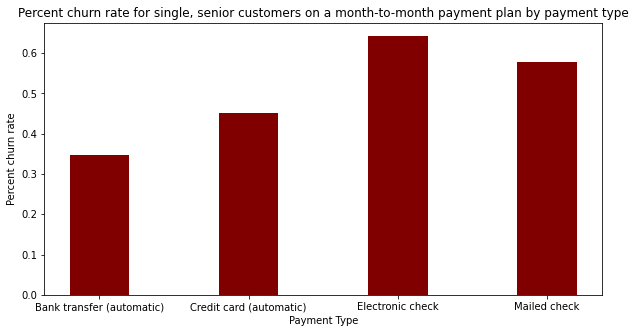

In [34]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df_4['payment_type'], values, color ='maroon',
        width = 0.4)

plt.xlabel("Payment Type")
plt.ylabel("Percent churn rate")
plt.title("Percent churn rate for single, senior customers on a month-to-month payment plan by payment type")
plt.show()


In [ ]:
##There appears to be a correlation between payment type and the churn rate for single, senior month-to-month customers. 
##However, adding this data in may complicate the point that we need to prioritize younger, non-single customers. 
##We may be able to make the point that senior single customers should be on automatic payments.